# Lecture 4
- HW2 posted last Monday, due upcoming Sunday
- Aobo Li's office hour is today 1-2pm at HDSI 453

## Sorting Algorithms
Near the end of last lecture I created a dumb_sort() algorithm:

In [1]:
def dumb_sort(alist):
    b=[] # I am making a place to put my numbers in order
    
    c=alist[:] # I am making a copy of the list so that I don't ruin my original list
    
    while len(c)>0: # I am going to loop over c and remove the largest each time.  I stop when there is nothing left
        
        largest=c[0] # assume the first element is the largest
        
        for item in c: #now run over all the elements in the remaining list 
            if item>largest: # and check if any are bigger
                largest=item # when you get somethign bigger, store it the biggest and continue
        
        b.append(largest) # after running through all the elements, add the largest to the output list
        
        c.pop(c.index(largest)) #remove the largest from c and repeat
    
    return b #when you have all the numbers in b, c=[] and the while loop will end.  Output b

In [2]:
unordered=[3,5,1,5,2,4,5,2,1]

In [3]:
dumb_sort(unordered)

[5, 5, 5, 4, 3, 2, 2, 1, 1]

Now let's create something better (in-place sorting):
- use the print command to understand what actually happened inside.

In [7]:
def mysort(a):
    for n in range(1,len(a)):
        value = a[n]
        i = n-1 #i is the previous index of the "current" value atn 
        while i>=0 and (value > a[i]):
            a[i+1] = a[i]
            a[i] = value # This essentially swap the value between a[n] and a[n-1]
            i -= 1
        print(a)


In [8]:
b = [1,7,5,8,1,9,2]
mysort(b)
print(b)

[7, 1, 5, 8, 1, 9, 2]
[7, 5, 1, 8, 1, 9, 2]
[8, 7, 5, 1, 1, 9, 2]
[8, 7, 5, 1, 1, 9, 2]
[9, 8, 7, 5, 1, 1, 2]
[9, 8, 7, 5, 2, 1, 1]
[9, 8, 7, 5, 2, 1, 1]


In [9]:
def position(t, x0, v, a):
    pos = x0 + v*t + a*t**2/2
    return pos

In [10]:
position(10, 0, 0, 9.8)

490.00000000000006

In [11]:
def position_short(t, x0=0, v=0, a=9.8):
    pos = x0 + v*t + a*t**2/2
    return pos

In [12]:
position_short(10)

490.00000000000006

even with the default setting, you can still overwrite variable values

In [13]:
position_short(10, x0=15)

505.00000000000006

# Numpy
stands for "Numerical Python"
(import numpy as np is almost a convention)

In [22]:
import numpy as np

print(np.sin(2), np.cos(np.pi))

we can define variables using these functions

In [25]:
pi = np.pi

In [26]:
print(pi)

3.141592653589793


At the core of numpy is an object called "numpy array"

In [27]:
a = np.array([1,4,1,5,15,20,22,1,45,3])

You can index/slice your numpy array almost the same way as your python list

In [28]:
print(a[3])
print(a[-1])
print(a[2:-2:3])

5
3
[ 1 20]


The biggest advantage of numpy array is that you can do mathematical operations upon it:
- np.ones give you an numpy array with given shape filled by 1

In [29]:
b = np.ones(len(a))
print(b)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [30]:
b = b*35.1
print(b)

[35.1 35.1 35.1 35.1 35.1 35.1 35.1 35.1 35.1 35.1]


you can even do math among 2 numpy arrays

In [31]:
print(a+b)
print(a*b)
print(a**3)
print(b**3)

[36.1 39.1 36.1 40.1 50.1 55.1 57.1 36.1 80.1 38.1]
[  35.1  140.4   35.1  175.5  526.5  702.   772.2   35.1 1579.5  105.3]
[    1    64     1   125  3375  8000 10648     1 91125    27]
[43243.551 43243.551 43243.551 43243.551 43243.551 43243.551 43243.551
 43243.551 43243.551 43243.551]


In [32]:
print(a*b) #Hadamard product

[  35.1  140.4   35.1  175.5  526.5  702.   772.2   35.1 1579.5  105.3]


In [33]:
c = np.array([2,4,2])
print(a+c)

ValueError: operands could not be broadcast together with shapes (10,) (3,) 

You can also create numpy array of higher dimensions

In [35]:
d = np.array([[1,2],[2,1]])
e = np.ones((3,3,3)) # this tuple (3,3,3) tells me what shape I want the "tensor" to have
print(d,d.shape)

[[1 2]
 [2 1]] (2, 2)


In [36]:
print(e,e.shape)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]] (3, 3, 3)


In [38]:
e = np.arange(9)
print(e.shape)

(9,)


In [39]:
f = e.reshape((3,3,))

In [40]:
print(f)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [41]:
e=np.arange(27)
f = e.reshape((3,3,3))
print(f)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


You can index high dimensional tensor f using multiple indices

In [42]:
f[0,2]

array([6, 7, 8])

In [43]:
f**2

array([[[  0,   1,   4],
        [  9,  16,  25],
        [ 36,  49,  64]],

       [[ 81, 100, 121],
        [144, 169, 196],
        [225, 256, 289]],

       [[324, 361, 400],
        [441, 484, 529],
        [576, 625, 676]]])

There are some ways you can select a subset of your array that satisfies certain conditions

In [45]:
e=np.arange(9)
f = e.reshape((3,3))
print(f)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


What if I'm interested in all the numbers above 5 in this matrix, and I want to know their locations?

In [46]:
np.where(f>5)

(array([2, 2, 2]), array([0, 1, 2]))

np.where returns you the row index and column index of all elements that satisfy the condition:
- (2,0)
- (2,1)
- (2,2)

In [47]:
def position(t, x0, v, a):
    pos = x0 + v*t + a*t**2/2
    return pos

In [53]:
t = np.linspace(0,100,1000)

np.linspace(start, stop, how many divisions you want to split it into)

In [51]:
d = position(t, 50, -100, 3)

In [55]:
import matplotlib.pyplot as plt

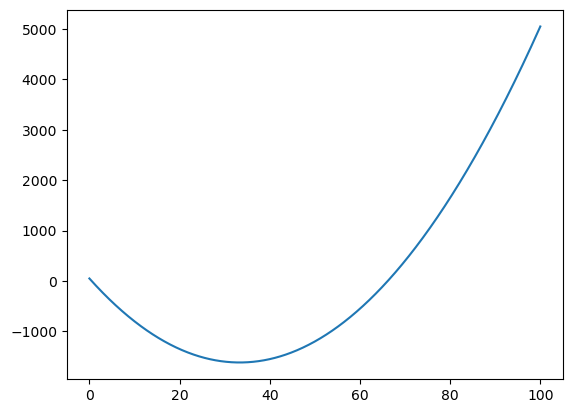

In [56]:
plt.plot(t, d)

In [61]:
tarray = np.array([t,t,t])
print(tarray.shape)
varray = np.zeros(tarray.shape)
aarray = np.ones(tarray.shape)
print(varray.shape)

(3, 1000)
(3, 1000)


In [64]:
varray[1,:] = np.ones(len(t))
varray[2,:] = np.ones(len(t))*2
aarray[1,:] = np.ones(len(t))*2
aarray[2,:] = np.ones(len(t))*3

In [65]:
darray = position(tarray, 0, varray, aarray)

In [67]:
print(darray.shape)

(3, 1000)


Text(0, 0.5, 'distance')

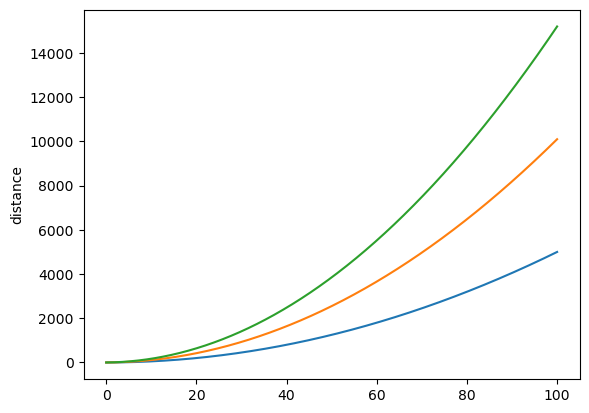

In [70]:
plt.plot(t, darray[0,:]) # velocity zero, accleeration one
plt.plot(t, darray[1,:]) # velocity one, acceleration two
plt.plot(t, darray[2,:]) # velocity two, acceleration three
plt.ylabel("distance")

One of the key advantage of numpy is that it conduct these array operations at very fast speed

In [71]:
import time

In [78]:
def trad_version():
    t1 = time.time() #this give me my current time
    X = range(int(1e7))
    Y = range(int(1e7))
    Z = []
    for i in range(len(X)):
        Z.append(X[i]+Y[i])
    return time.time()-t1

In [79]:
def numpy_version():
    t1 = time.time() #this give me my current time
    X = np.arange(int(1e7))
    Y = np.arange(int(1e7))
    Z = X+Y
    return(time.time() - t1)

In [80]:
print(f"traditional {trad_version()} numpy {numpy_version()}")

traditional 2.049133539199829 numpy 0.04936695098876953


## Some basic numpy tools

In [81]:
print(np.arange(10))
print(np.arange(3,14))
print(np.arange(3,14,2))
print(np.arange(0,1,0.1))

[0 1 2 3 4 5 6 7 8 9]
[ 3  4  5  6  7  8  9 10 11 12 13]
[ 3  5  7  9 11 13]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [83]:
print(np.linspace(2,5,10))
print(np.linspace(2,5,10,endpoint=False))

[2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.         4.33333333 4.66666667 5.        ]
[2.  2.3 2.6 2.9 3.2 3.5 3.8 4.1 4.4 4.7]


In [84]:
print(np.logspace(0,2,10))

[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


so logspace goes from 10^0 to 10^2 with 10 points evenly selection in between

In [85]:
print(np.ones((3,3)))
print(np.ones(10))
print(np.zeros((3,3)))
print(np.zeros(10))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [86]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [87]:
np.identity(5) # the same as np.diag([1,1,1,1,1])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

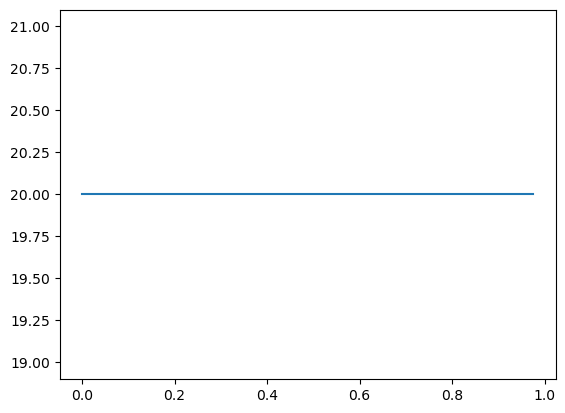

In [89]:
x = np.arange(0,1,0.025)
plt.plot(x,np.ones(len(x))*20)

In [90]:
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = x[i:].sum()

In [92]:
print(x)
print(y)

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975]
[19.5   19.5   19.475 19.425 19.35  19.25  19.125 18.975 18.8   18.6
 18.375 18.125 17.85  17.55  17.225 16.875 16.5   16.1   15.675 15.225
 14.75  14.25  13.725 13.175 12.6   12.    11.375 10.725 10.05   9.35
  8.625  7.875  7.1    6.3    5.475  4.625  3.75   2.85   1.925  0.975]


In [93]:
sum_test = np.arange(9).reshape(3,3)
print(sum_test)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [94]:
sum_test.sum() #I can sum up the entire matrix to a single number

36

In [95]:
sum_test.sum(axis=0)

array([ 9, 12, 15])

In [96]:
sum_test.sum(axis=1)

array([ 3, 12, 21])

You can also select a specific dimension and sum over it

In [98]:
print(sum_test[0])
sum_test[0,:].sum()

[0 1 2]


3

In [102]:
vec100 = np.arange(300).reshape(100,3)
print(vec100[0:5,:])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [103]:
length_square = (vec100**2).sum(axis=1)

In [104]:
print(length_square)

[     5     50    149    302    509    770   1085   1454   1877   2354
   2885   3470   4109   4802   5549   6350   7205   8114   9077  10094
  11165  12290  13469  14702  15989  17330  18725  20174  21677  23234
  24845  26510  28229  30002  31829  33710  35645  37634  39677  41774
  43925  46130  48389  50702  53069  55490  57965  60494  63077  65714
  68405  71150  73949  76802  79709  82670  85685  88754  91877  95054
  98285 101570 104909 108302 111749 115250 118805 122414 126077 129794
 133565 137390 141269 145202 149189 153230 157325 161474 165677 169934
 174245 178610 183029 187502 192029 196610 201245 205934 210677 215474
 220325 225230 230189 235202 240269 245390 250565 255794 261077 266414]


## Meshgrid

Meshgrid is a useful tool when dealing with high dimensional problems.

In [106]:
Lx = 1.
Ly = 2.
n = 5
x_array = np.linspace(0,Lx,n)
y_array = np.linspace(0,Ly,n)
print(x,y)

[0.   0.25 0.5  0.75 1.  ] [0.  0.5 1.  1.5 2. ]


In [107]:
x, y = np.meshgrid(x_array, y_array, indexing='ij')

In [108]:
print(x)

[[0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25]
 [0.5  0.5  0.5  0.5  0.5 ]
 [0.75 0.75 0.75 0.75 0.75]
 [1.   1.   1.   1.   1.  ]]


In [109]:
print(y)

[[0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]]


Why is this useful? because we can use it to evaluate a function at 2D space

In [110]:
Ex = 5*np.sin(2.*pi*x/Lx)*np.cos(2*pi*y/Lx)

In [111]:
print(Ex)

[[ 0.0000000e+00 -0.0000000e+00  0.0000000e+00 -0.0000000e+00
   0.0000000e+00]
 [ 5.0000000e+00 -5.0000000e+00  5.0000000e+00 -5.0000000e+00
   5.0000000e+00]
 [ 6.1232340e-16 -6.1232340e-16  6.1232340e-16 -6.1232340e-16
   6.1232340e-16]
 [-5.0000000e+00  5.0000000e+00 -5.0000000e+00  5.0000000e+00
  -5.0000000e+00]
 [-1.2246468e-15  1.2246468e-15 -1.2246468e-15  1.2246468e-15
  -1.2246468e-15]]


In [112]:
Ey = 10*np.sin(2*pi*y/Ly)

In [113]:
print(Ey)

[[ 0.0000000e+00  1.0000000e+01  1.2246468e-15 -1.0000000e+01
  -2.4492936e-15]
 [ 0.0000000e+00  1.0000000e+01  1.2246468e-15 -1.0000000e+01
  -2.4492936e-15]
 [ 0.0000000e+00  1.0000000e+01  1.2246468e-15 -1.0000000e+01
  -2.4492936e-15]
 [ 0.0000000e+00  1.0000000e+01  1.2246468e-15 -1.0000000e+01
  -2.4492936e-15]
 [ 0.0000000e+00  1.0000000e+01  1.2246468e-15 -1.0000000e+01
  -2.4492936e-15]]


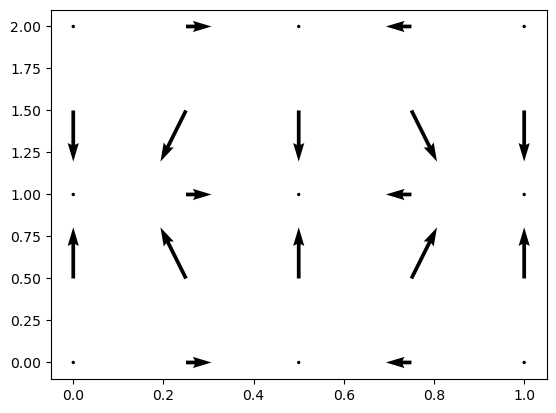

In [116]:
plt.figure()
plt.quiver(x,y,Ex,Ey,units="width")
plt.show()

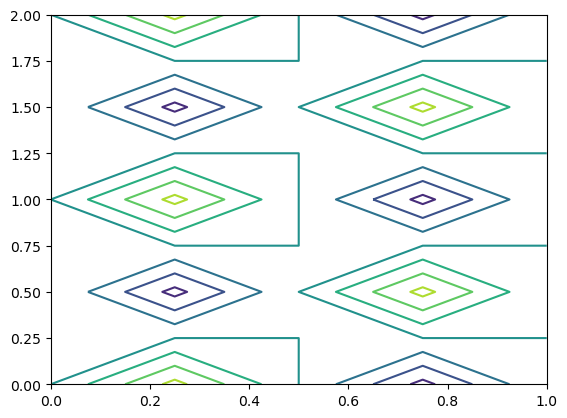

In [117]:
plt.contour(x,y,Ex)

In [118]:
Lz = 3
z_array = np.linspace(0,Lz,n,endpoint=True)

In [120]:
x, y, z = np.meshgrid(x_array, y_array, z_array)

In [121]:
print(x.shape)

(5, 5, 5)


In [122]:
print(x[0,:,0])

[0.   0.25 0.5  0.75 1.  ]


In [123]:
T = (x+2*y)*z

In [124]:
print(T)

[[[ 0.      0.      0.      0.      0.    ]
  [ 0.      0.1875  0.375   0.5625  0.75  ]
  [ 0.      0.375   0.75    1.125   1.5   ]
  [ 0.      0.5625  1.125   1.6875  2.25  ]
  [ 0.      0.75    1.5     2.25    3.    ]]

 [[ 0.      0.75    1.5     2.25    3.    ]
  [ 0.      0.9375  1.875   2.8125  3.75  ]
  [ 0.      1.125   2.25    3.375   4.5   ]
  [ 0.      1.3125  2.625   3.9375  5.25  ]
  [ 0.      1.5     3.      4.5     6.    ]]

 [[ 0.      1.5     3.      4.5     6.    ]
  [ 0.      1.6875  3.375   5.0625  6.75  ]
  [ 0.      1.875   3.75    5.625   7.5   ]
  [ 0.      2.0625  4.125   6.1875  8.25  ]
  [ 0.      2.25    4.5     6.75    9.    ]]

 [[ 0.      2.25    4.5     6.75    9.    ]
  [ 0.      2.4375  4.875   7.3125  9.75  ]
  [ 0.      2.625   5.25    7.875  10.5   ]
  [ 0.      2.8125  5.625   8.4375 11.25  ]
  [ 0.      3.      6.      9.     12.    ]]

 [[ 0.      3.      6.      9.     12.    ]
  [ 0.      3.1875  6.375   9.5625 12.75  ]
  [ 0.      3.375   6.75